Very simple plotter

In [9]:
%config InlineBackend.figure_format = 'retina'
InteractiveShell.ast_node_interactivity = 'last_expr'

In [15]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ysvisutilpy2005ud as yvu

In [16]:
# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
rcParams.update({'font.size':15})
rcParams.update({'mathtext.fontset':'dejavuserif'})

In [17]:
final_phot_targ = Path("phot_targ_vis_inspected.csv")

if not final_phot_targ.exists():
    phot_raw = pd.read_csv("phot_targ.csv")
    vis_insp = pd.read_csv("vis_insp.csv", comment='#')
    phot_raw.set_index('file', inplace=True)
    vis_insp.set_index('file', inplace=True)

    phot_raw["serious"] = 0
    
    # inspected = phot_raw.loc[phot_raw["file"].str.split('/', expand=True)[1].isin(vis_insp["file"])]
    inspected = phot_raw.loc[phot_raw.index.isin(vis_insp.index)]

    for i, row in inspected.iterrows():
        phot_raw.at[i, "serious"] = vis_insp.at[i, "serious"]
        phot_raw.at[i, "vis_insp_comment"] = vis_insp.at[i, "comment"]
    phot_raw.sort_values("jd_target", inplace=True)
    phot_raw.to_csv(final_phot_targ, index=False)

phot_raw = pd.read_csv(final_phot_targ)

phot = phot_raw.loc[phot_raw["serious"] == 0]
phot_attention = phot_raw.loc[phot_raw["serious"] == 1]
phot_reject = phot_raw.loc[phot_raw["serious"] == 2]

print(np.count_nonzero(phot_raw["serious"]))

41


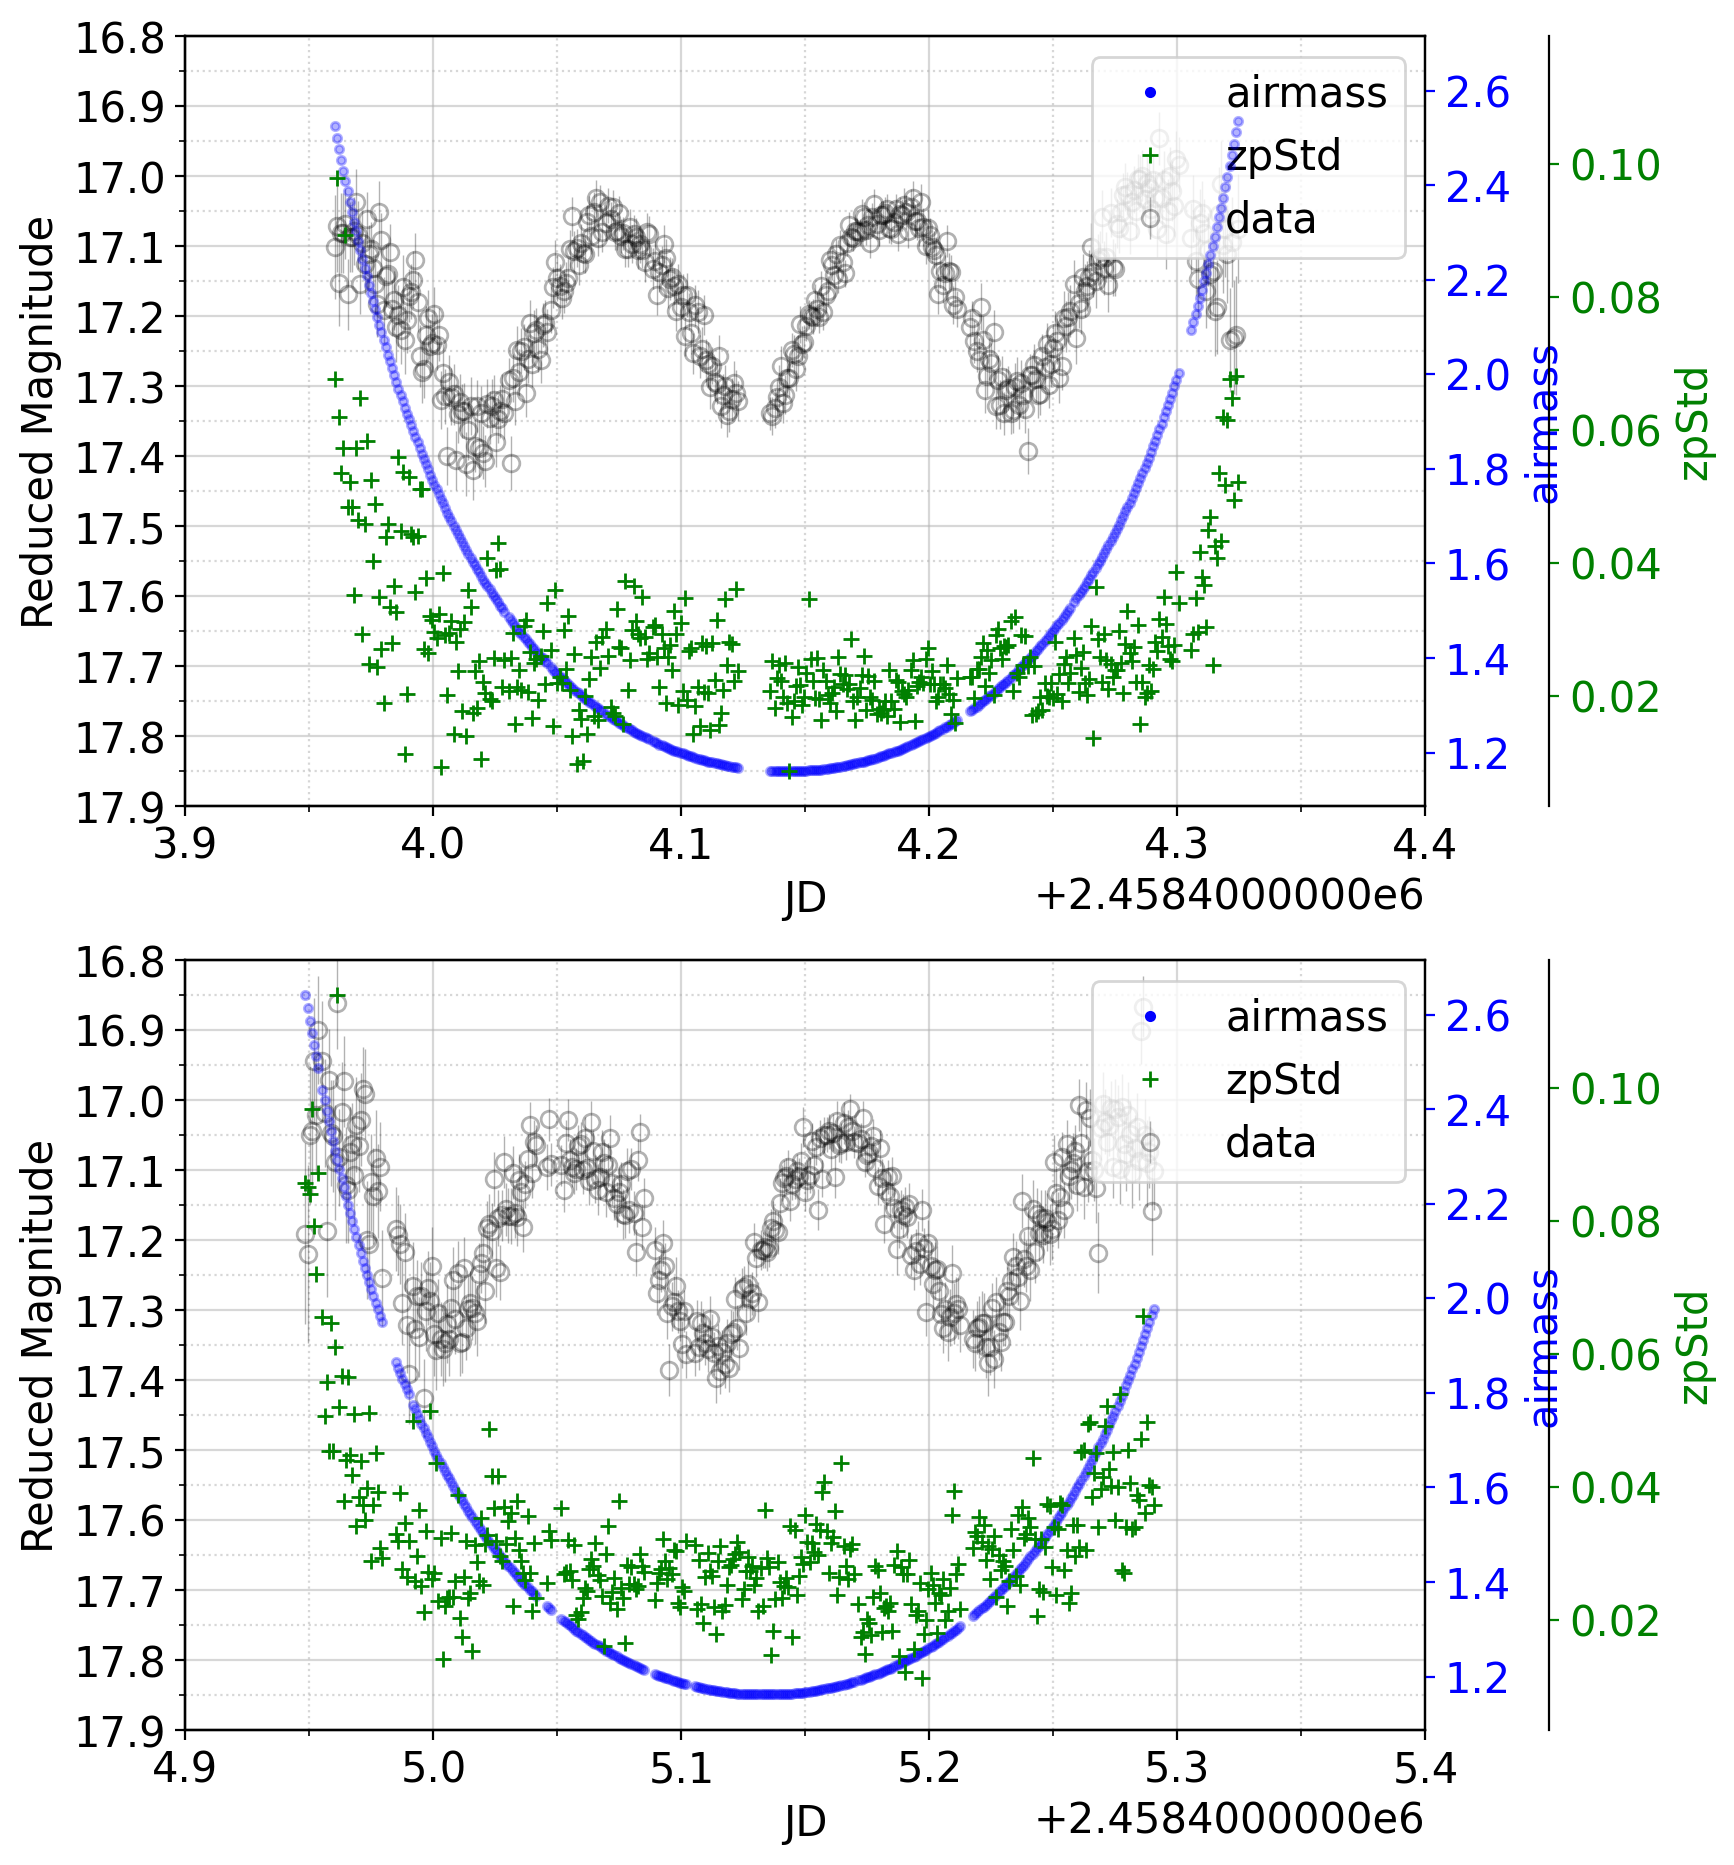

In [19]:
errbfmt = dict(capsize=0, elinewidth=0.5, ls='')
dummy = ([np.nan], [np.nan])

fig, axs = plt.subplots(2, 1, figsize=(8, 11))
axs[0].errorbar(phot["jd_target"], phot['m_red'], yerr=phot['dm_red'], **errbfmt,
                label="data", marker='o', color='k', mfc='none',
                alpha=0.3)
axs[0].plot(*dummy, 'b.', label="airmass")
axs[0].plot(*dummy, 'g+', label="zpStd")


am0 = axs[0].twinx()
am0.plot(phot["jd_target"], phot["airmass"], 'b.', alpha=0.3)
am0.set_ylabel("airmass", color='b')
am0.tick_params('y', colors='b')

std0 = axs[0].twinx()
std0.spines["right"].set_position(("axes", 1.1))
std0.plot(phot["jd_target"], phot["zpStd"], 'g+')
std0.set_ylabel("zpStd", color='g')
std0.tick_params('y', colors='g')

axs[1].errorbar(phot["jd_target"], phot['m_red'], yerr=phot['dm_red'], **errbfmt,
                label="data", marker='o', color='k', mfc='none',
                alpha=0.3)
axs[1].plot(*dummy, 'b.', label="airmass")
axs[1].plot(*dummy, 'g+', label="zpStd")

am1 = axs[1].twinx()
am1.plot(phot["jd_target"], phot["airmass"], 'b.', alpha=0.3)
am1.set_ylabel("airmass", color='b')
am1.tick_params('y', colors='b')

std1 = axs[1].twinx()
std1.spines["right"].set_position(("axes", 1.1))
std1.plot(phot["jd_target"], phot["zpStd"], 'g+')
std1.set_ylabel("zpStd", color='g')
std1.tick_params('y', colors='g')

for ax in [axs[0], axs[1]]:
    ax.set(ylim=(17.9, 16.8),
           xlabel="JD", ylabel="Reduced Magnitude")
    ax.legend(loc=1)
    
axs[0].set_xlim(2458403.9, 2458404.4)
axs[1].set_xlim(2458404.9, 2458405.4)

yvu.linticker(axs.tolist(),
              xmajlockws=[0.1], xminlockws=[0.05],
              ymajlockws=[0.1], yminlockws=[0.05])

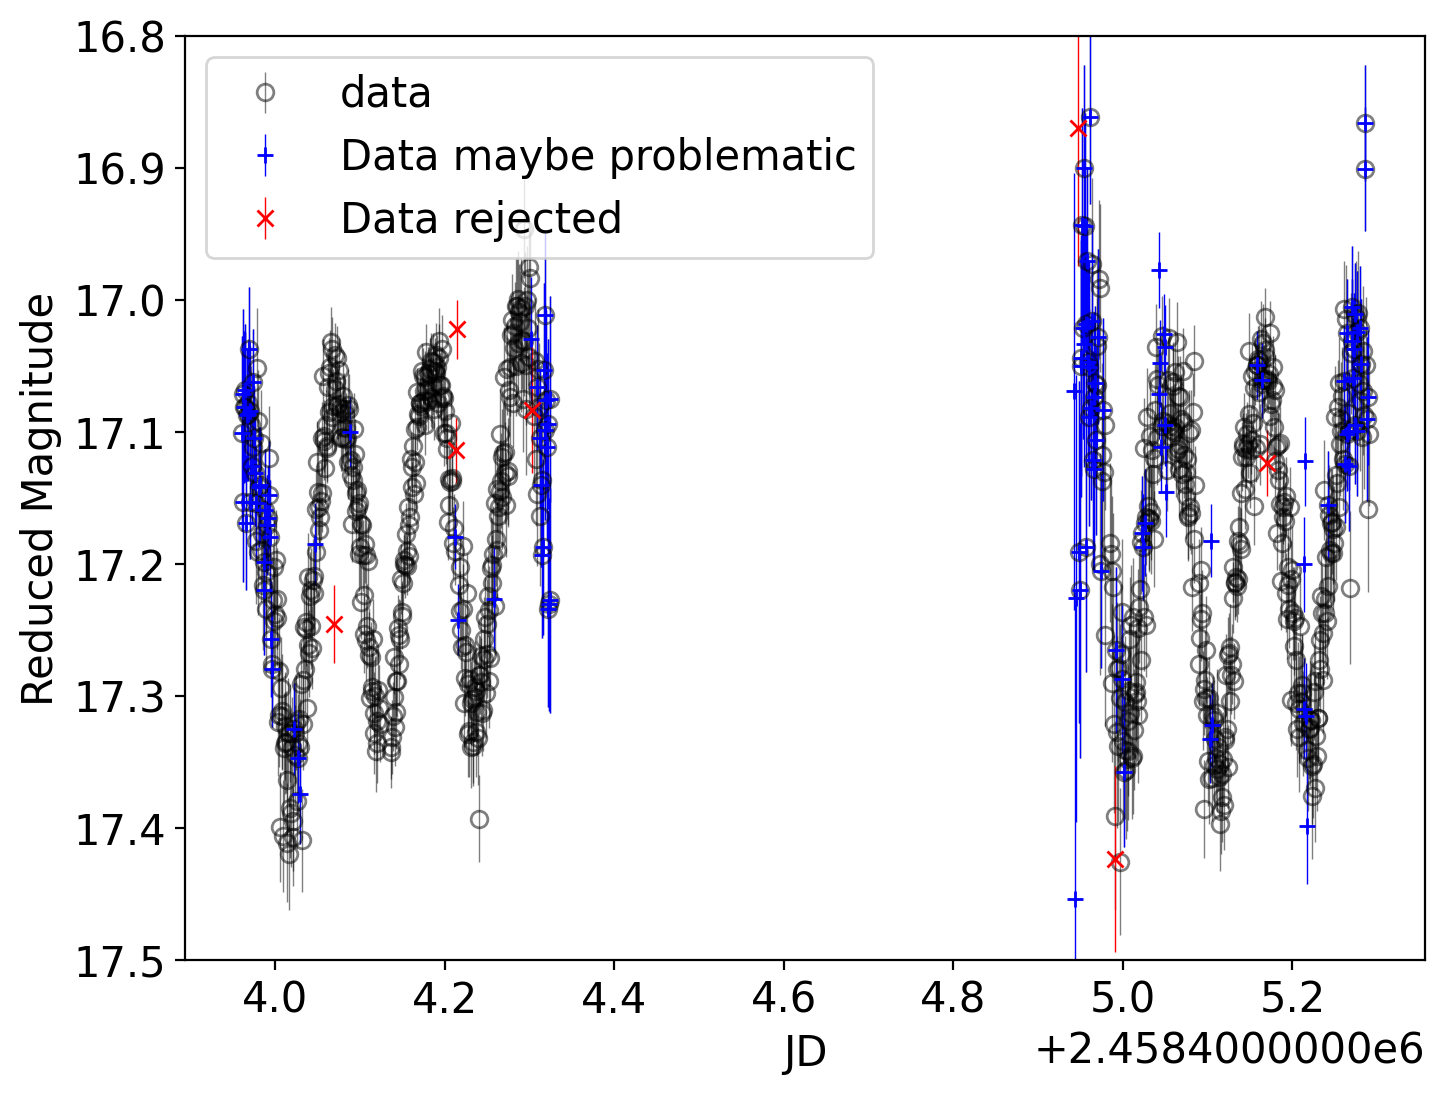

In [20]:
zpmask = phot["zpStd"] > 0.04
phot_zp = phot.loc[zpmask]
phot_nozp = phot.loc[~zpmask]

errbfmt = dict(capsize=0, elinewidth=0.5, ls='')
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.errorbar(phot["jd_target"], phot['m_red'], yerr=phot['dm_red'], **errbfmt,
             label="data", marker='o', color='k', mfc='none', 
            alpha=0.5)
axs.errorbar(phot_attention["jd_target"], phot_attention['m_red'],
             yerr=phot_attention['dm_red'], **errbfmt,
             marker='+', color='b',
             label="Data maybe problematic")
axs.errorbar(phot_zp["jd_target"], phot_zp['m_red'],
             yerr=phot_zp['dm_red'], **errbfmt,
             marker='+', color='b')
axs.errorbar(phot_reject["jd_target"], phot_reject['m_red'],
             yerr=phot_reject['dm_red'], **errbfmt,
             marker='x', color='r',
            label="Data rejected")
axs.set(ylim=(17.5, 16.8),
        xlabel="JD", ylabel="Reduced Magnitude")

axs.legend()

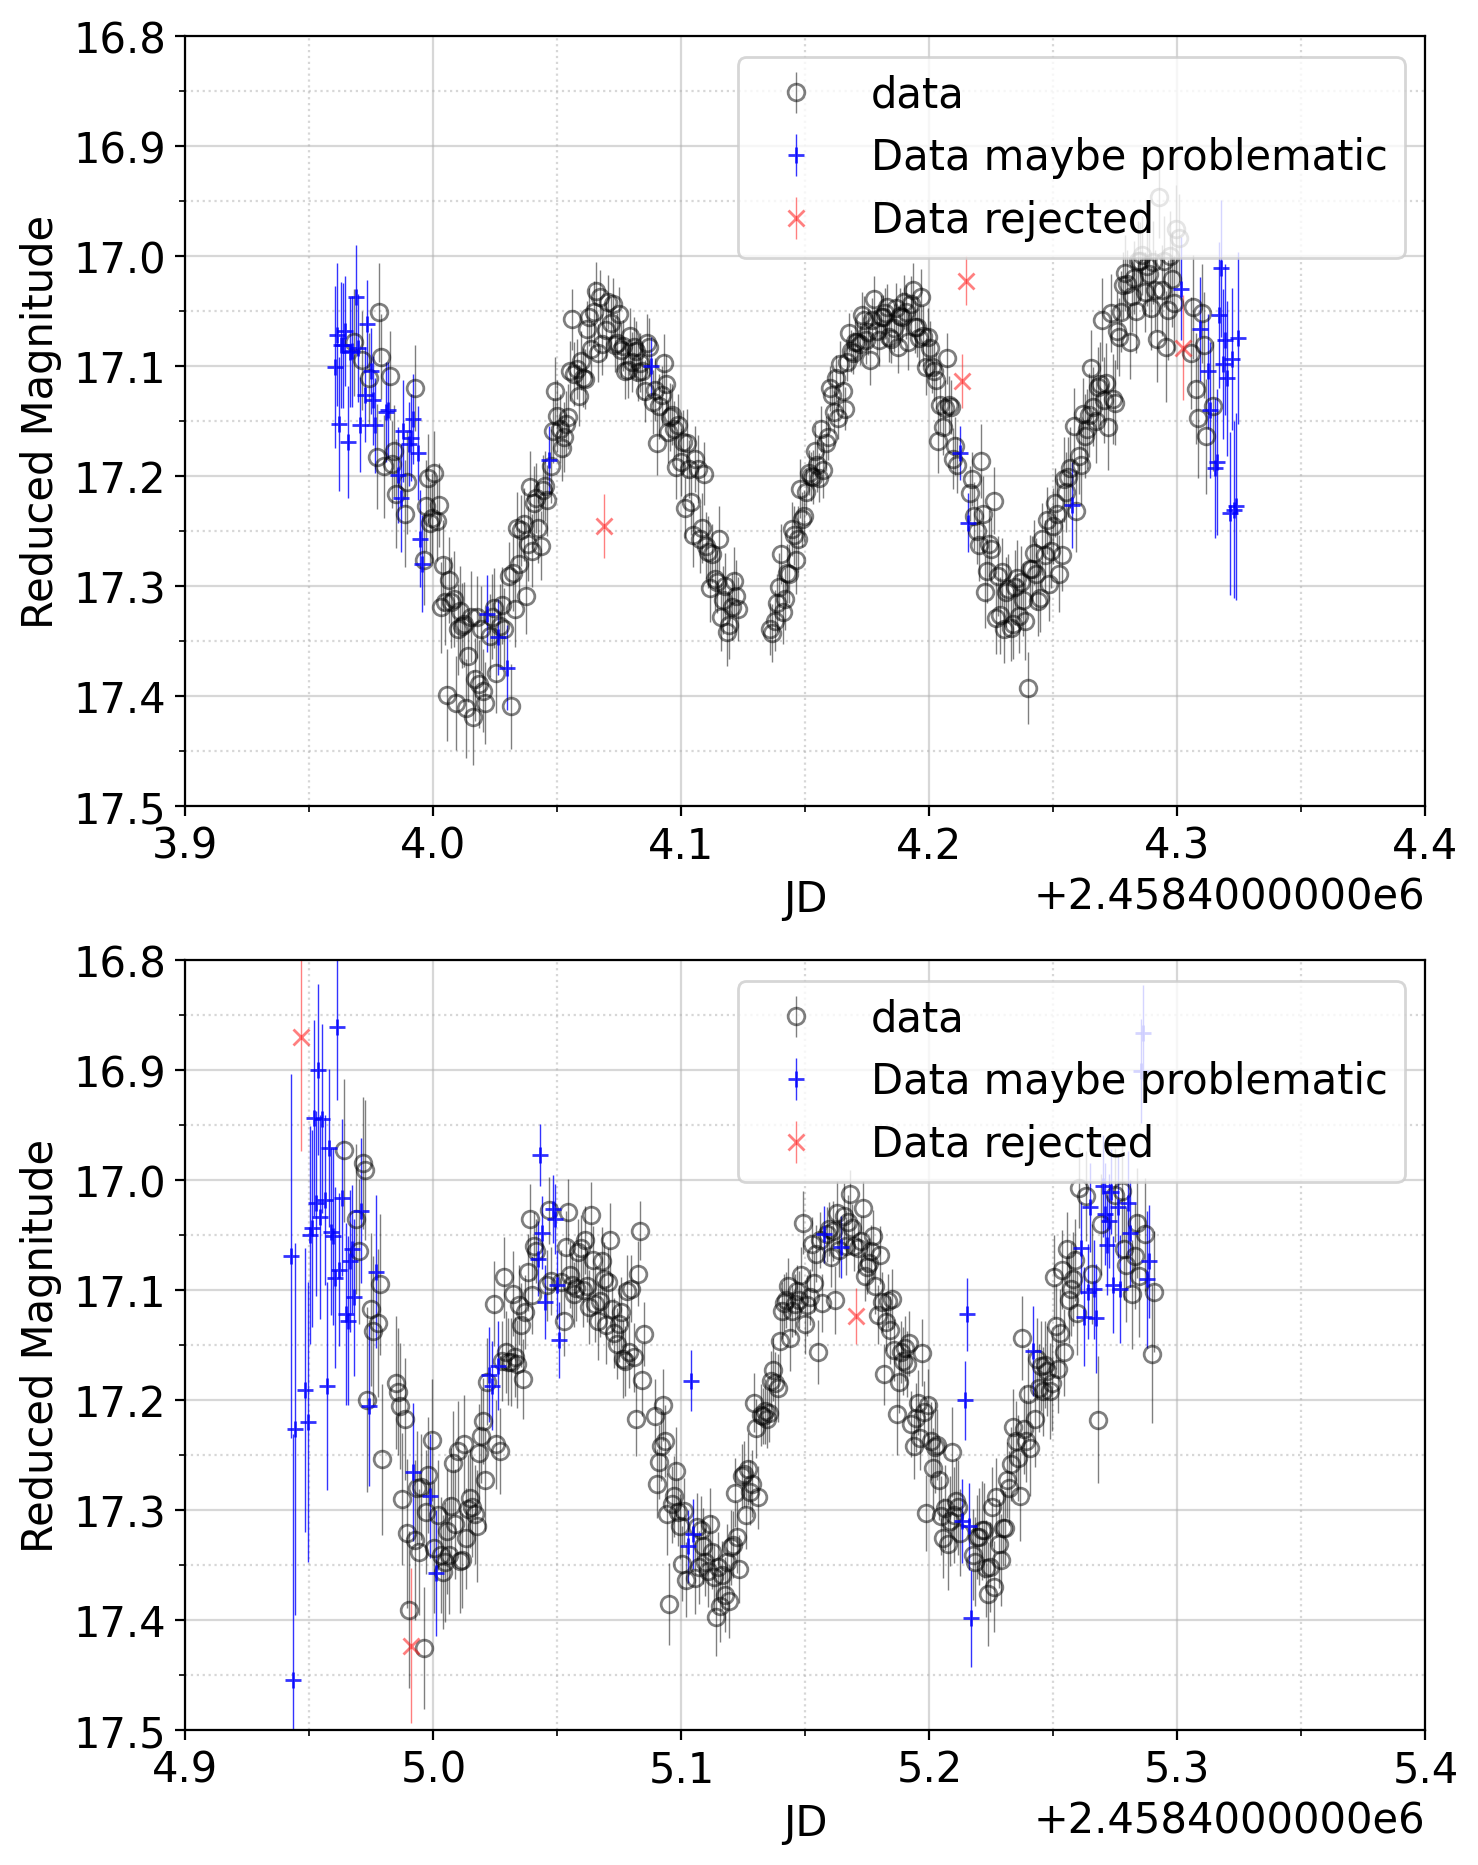

In [21]:
errbfmt = dict(capsize=0, elinewidth=0.5, ls='')
dummy = ([np.nan], [np.nan])

fig, axs = plt.subplots(2, 1, figsize=(8, 11))

for ax in axs.tolist():
    ax.errorbar(phot_nozp["jd_target"], phot_nozp['m_red'], yerr=phot_nozp['dm_red'], **errbfmt,
                 label="data", marker='o', color='k', mfc='none', 
                alpha=0.5)
    ax.errorbar(phot_attention["jd_target"], phot_attention['m_red'],
                 yerr=phot_attention['dm_red'], **errbfmt,
                 marker='+', color='b', alpha=0.8,
                 label="Data maybe problematic")
    ax.errorbar(phot_zp["jd_target"], phot_zp['m_red'],
                 yerr=phot_zp['dm_red'], **errbfmt, alpha=0.8,
                 marker='+', color='b')
    ax.errorbar(phot_reject["jd_target"], phot_reject['m_red'],
                 yerr=phot_reject['dm_red'], **errbfmt,
                 marker='x', color='r', alpha=0.5,
                label="Data rejected")

    
for ax in [axs[0], axs[1]]:
    ax.set(ylim=(17.5, 16.8),
           xlabel="JD", ylabel="Reduced Magnitude")
    ax.legend(loc=1)
axs[0].set_xlim(2458403.9, 2458404.4)
axs[1].set_xlim(2458404.9, 2458405.4)

yvu.linticker(axs.tolist(),
              xmajlockws=[0.1], xminlockws=[0.05],
              ymajlockws=[0.1], yminlockws=[0.05])

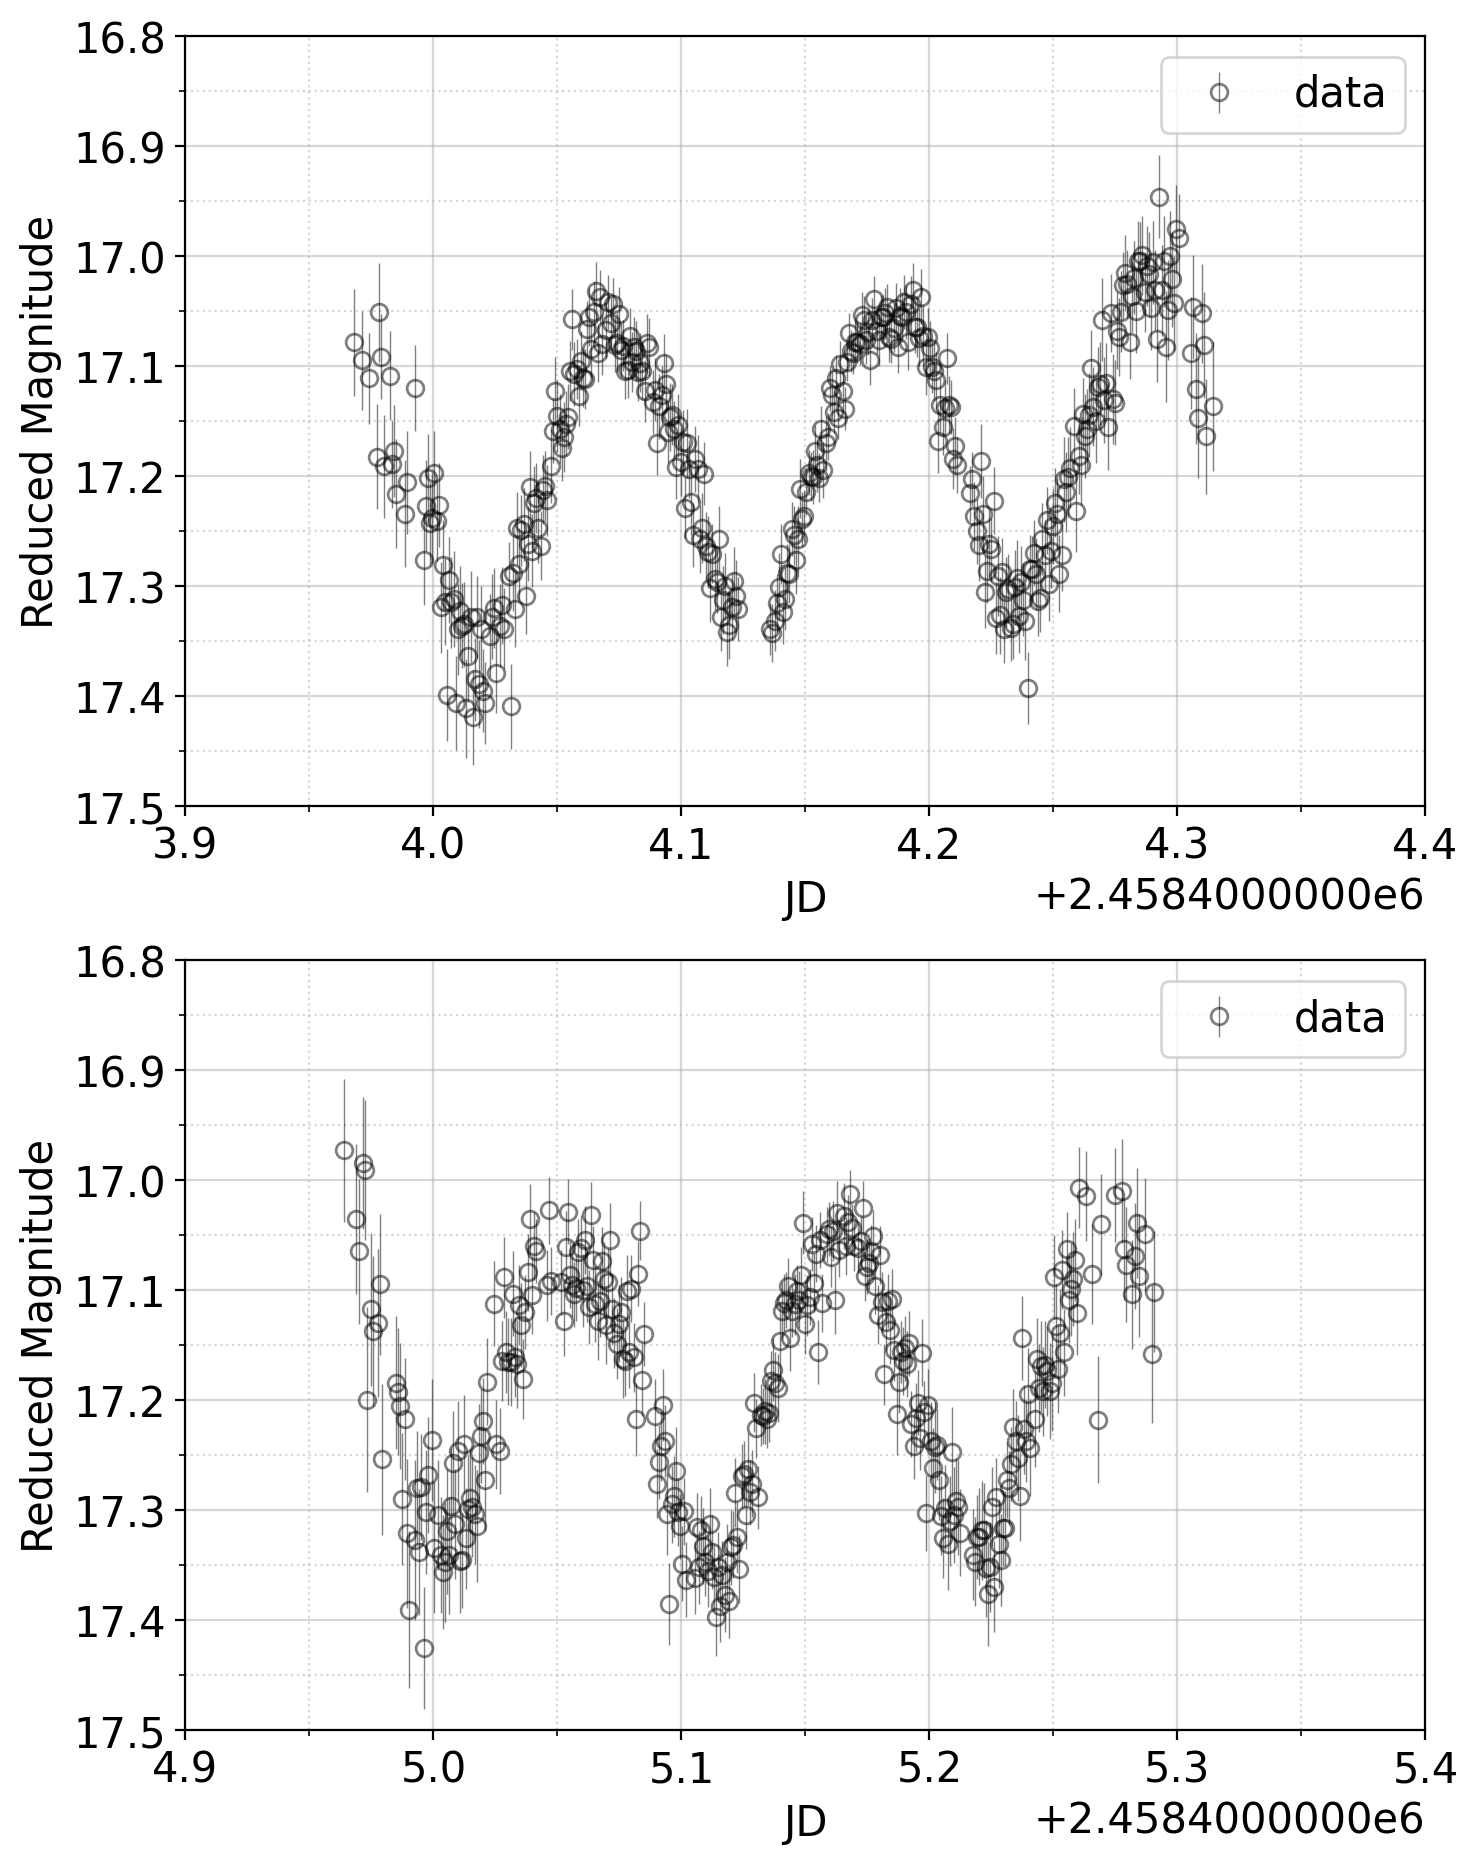

In [22]:
errbfmt = dict(capsize=0, elinewidth=0.5, ls='')
dummy = ([np.nan], [np.nan])

fig, axs = plt.subplots(2, 1, figsize=(8, 11))

for ax in axs.tolist():
    ax.errorbar(phot_nozp["jd_target"], phot_nozp['m_red'], yerr=phot_nozp['dm_red'], **errbfmt,
                 label="data", marker='o', color='k', mfc='none', 
                alpha=0.5)

    
for ax in [axs[0], axs[1]]:
    ax.set(ylim=(17.5, 16.8),
           xlabel="JD", ylabel="Reduced Magnitude")
    ax.legend(loc=1)
axs[0].set_xlim(2458403.9, 2458404.4)
axs[1].set_xlim(2458404.9, 2458405.4)

yvu.linticker(axs.tolist(),
              xmajlockws=[0.1], xminlockws=[0.05],
              ymajlockws=[0.1], yminlockws=[0.05])

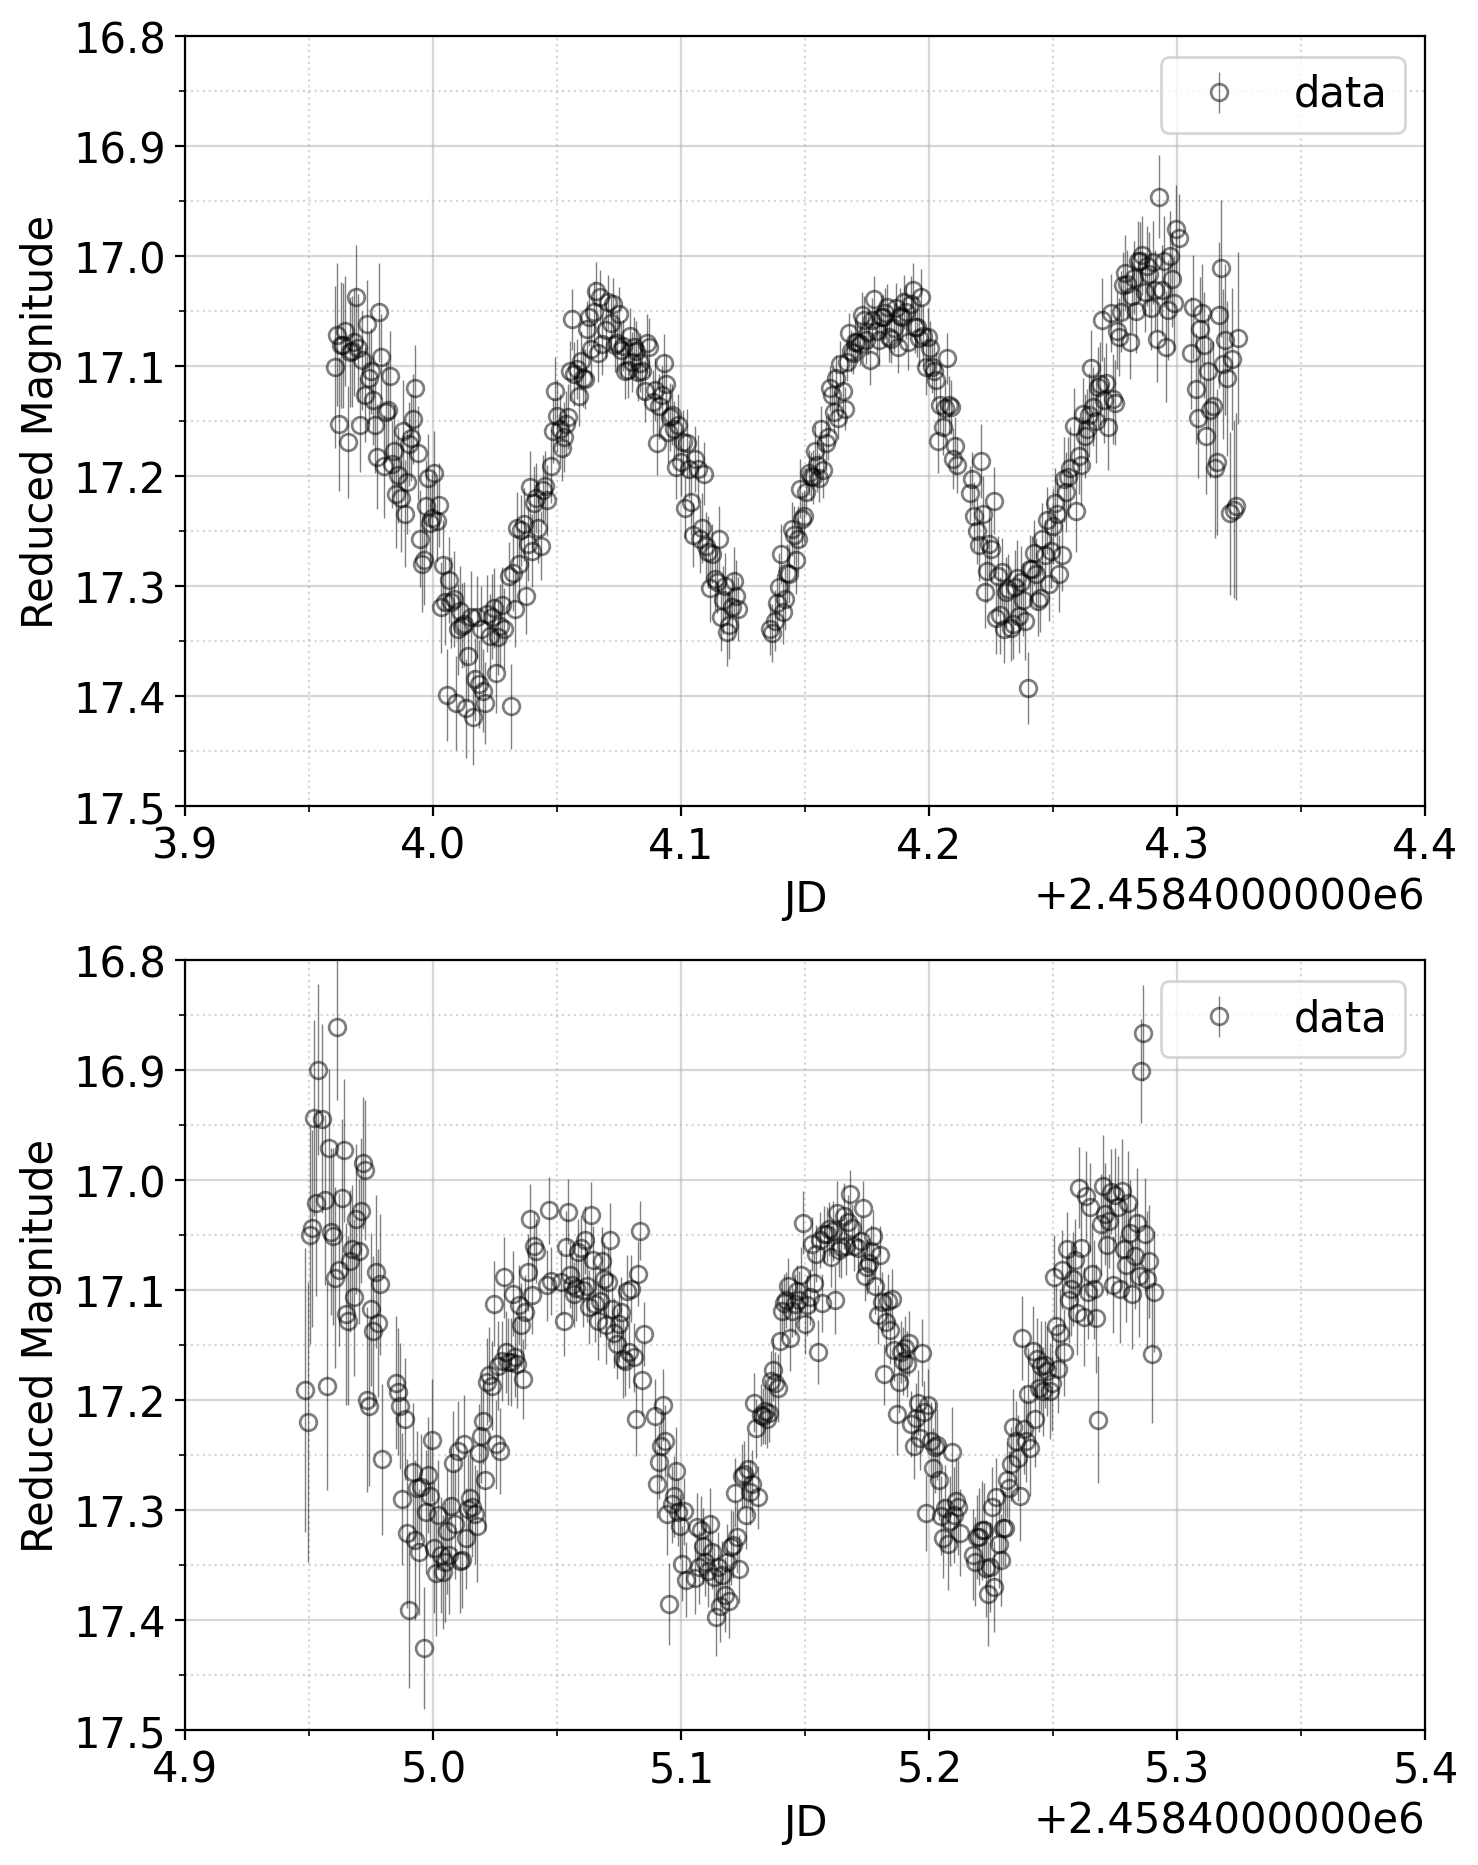

In [23]:
errbfmt = dict(capsize=0, elinewidth=0.5, ls='')
dummy = ([np.nan], [np.nan])

fig, axs = plt.subplots(2, 1, figsize=(8, 11))

for ax in axs.tolist():
    ax.errorbar(phot["jd_target"], phot['m_red'], yerr=phot['dm_red'], **errbfmt,
                 label="data", marker='o', color='k', mfc='none', 
                alpha=0.5)

    
for ax in [axs[0], axs[1]]:
    ax.set(ylim=(17.5, 16.8),
           xlabel="JD", ylabel="Reduced Magnitude")
    ax.legend(loc=1)
axs[0].set_xlim(2458403.9, 2458404.4)
axs[1].set_xlim(2458404.9, 2458405.4)

yvu.linticker(axs.tolist(),
              xmajlockws=[0.1], xminlockws=[0.05],
              ymajlockws=[0.1], yminlockws=[0.05])

In [24]:
for tab in [phot_raw, phot_reject, phot_attention, phot_zp]:
    print(len(tab))

810
14
27
99


From Kuroda 2019-09-23:

    Period[day]: 0.218282 +/- 0.000092
    Amplitude[mag]: 0.293
    Mean magnitude[mag]: 17.182 at 2018-10-12, 17.189 at 2018-10-13
    
Also from Kuroda 2020-03-27 (remove the following points as they deviated from the fitted light curve by more than 0.15 mag and 0.10 mag, separated by a newline):

    58403.56885,58403.71387,58403.71473,58403.80302,58403.80388,58403.80474,58403.81760,
    58404.44328,58404.44413,58404.44499,58404.44585,58404.44669,58404.44755,58404.44926,
    58404.45353,58404.46124,58404.47151,58404.47237,58404.71502,58404.76813,58404.78527,
    58404.78613
    58403.46536,58403.50556,58403.53121,58403.79274,58403.81674,58403.81931,58403.82188,
    58403.82446,58404.44841,58404.45183,58404.45525,58404.45696,58404.45781,58404.46381,
    58404.46895,58404.47066,58404.47665,58404.47836,58404.49090,58404.54308,58404.58328,
    58404.59515,58404.60371,58404.71417,58404.73729

total 47 (22+25) points, but many of them have already been rejected from my visual inspection, so only 28 are rejected (check ``np.count_nonzero(deviated_mask)``).

2018-10-12 airmass: 1.160, 2.525
2018-10-13 airmass: 1.162, 2.587


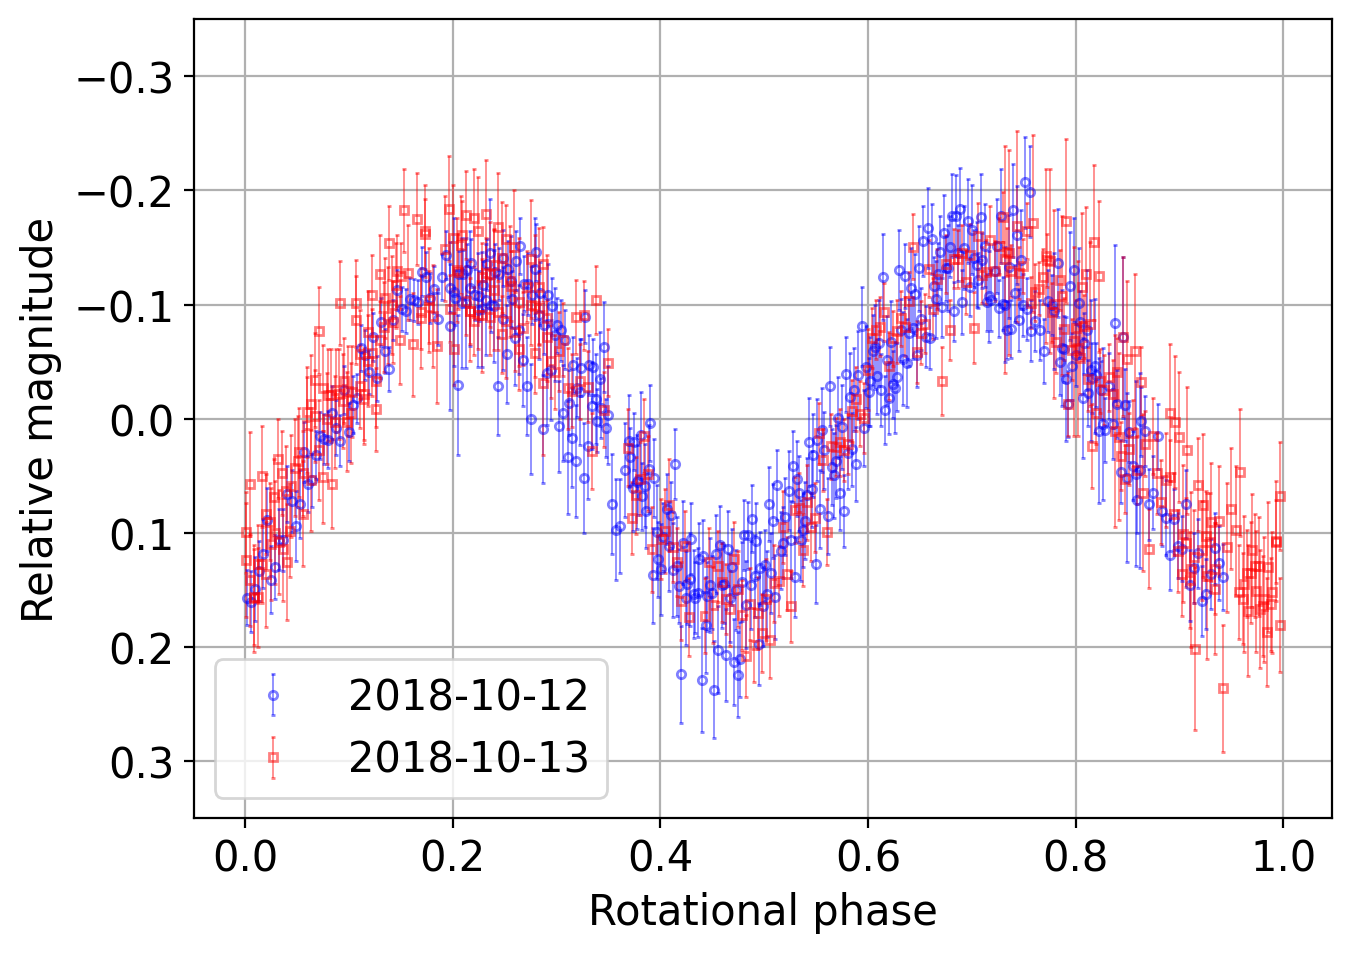

In [29]:
# JD to MJD
mjd_decimal5_round = (((phot['jd_target'] - 2400000.5).round(4))).values
mjd_decimal5_floor = (((phot['jd_target'] - 2400000.5)*1.e+4).apply(np.floor)/1.e+5).values

# list of points to reject
deviated_points = np.array([
    58403.56885,58403.71387,58403.71473,58403.80302,58403.80388,58403.80474,58403.81760,
    58404.44328,58404.44413,58404.44499,58404.44585,58404.44669,58404.44755,58404.44926,
    58404.45353,58404.46124,58404.47151,58404.47237,58404.71502,58404.76813,58404.78527,
    58404.78613,
    58403.46536,58403.50556,58403.53121,58403.79274,58403.81674,58403.81931,58403.82188,
    58403.82446,58404.44841,58404.45183,58404.45525,58404.45696,58404.45781,58404.46381,
    58404.46895,58404.47066,58404.47665,58404.47836,58404.49090,58404.54308,58404.58328,
    58404.59515,58404.60371,58404.71417,58404.73729
    ])
deviated_points = deviated_points.round(4)
deviated_mask = (np.isin(mjd_decimal5_round, deviated_points) | np.isin(mjd_decimal5_floor, deviated_points))

phot_good = phot[~deviated_mask]
m_12 = phot_good["datetime_str"].str.startswith("2018-Oct-12")

from_kuroda = {"2018-10-12": 17.182, "2018-10-13":17.189}
period = 0.218282  # day

data = {"2018-10-12": phot_good[m_12], "2018-10-13": phot_good[~m_12]}
fmts = {"2018-10-12": dict(marker='o', color='b', ms=3, mfc='none'), 
        "2018-10-13": dict(marker='s', color='r', ms=3, mfc='none')}
errbfmt = dict(ls='', capsize=0.7, elinewidth=0.6)
fig, axs = plt.subplots(1, 1, figsize=(7, 5), sharex=False, sharey=False, gridspec_kw=None)

for k, d in data.items():
    times = (d["jd_target"]/period + 0.75) % 1
    axs.errorbar(times, d["m_red"] - from_kuroda[k], 
                 yerr=d["dm_red"], alpha=0.5,
                 **errbfmt, **fmts[k], label=k)
    print(k, "airmass: {:.3f}, {:.3f}".format(np.min(d['airmass']),
                                              np.max(d['airmass'])))
    
axs.set(ylim=(0.35, -0.35), 
        xlabel="Rotational phase", 
        ylabel="Relative magnitude")
axs.legend(loc=3)
axs.grid()
plt.tight_layout()
plt.savefig("LC.png", dpi=300)
plt.savefig("LC.pdf")

In [30]:
print(len(phot_good))

740


Removed points from Kuroda are exaggerated below:

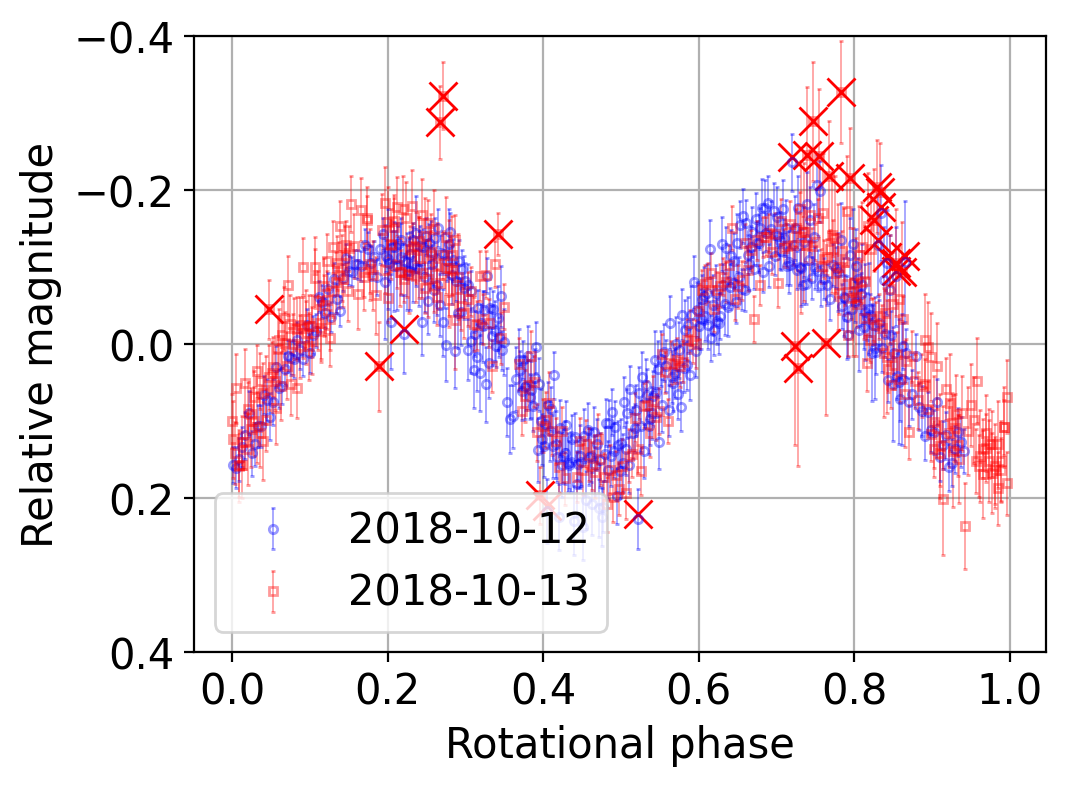

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 4), sharex=False, sharey=False, gridspec_kw=None)

m_12 = phot["datetime_str"].str.startswith("2018-Oct-12")

data = {"2018-10-12": phot[m_12], "2018-10-13": phot[~m_12]}
fmts = {"2018-10-12": dict(marker='o', color='b', ms=3, mfc='none'), 
        "2018-10-13": dict(marker='s', color='r', ms=3, mfc='none')}

for k, d in data.items():
    times = (d["jd_target"]/period + 0.75) % 1
    axs.errorbar(times, d["m_red"] - from_kuroda[k], 
                 yerr=d["dm_red"],
                 **errbfmt, **fmts[k], alpha=0.4, label=k)

deviated_times = (phot[deviated_mask]['jd_target']/period + 0.75) % 1
axs.plot(deviated_times, phot[deviated_mask]['m_red'] - from_kuroda[k], 'rx', ms=10)

    
axs.set(ylim=(0.4, -0.4), 
        xlabel="Rotational phase", 
        ylabel="Relative magnitude")
axs.legend(loc=3)
axs.grid()
